## Data Analytic - Stock Market Analysis

### Read Data from CSV files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get Tesla Stock Data
tesla = pd.read_csv('Tesla_Stock.csv', parse_dates=True)
# Set 'Date' as index
tesla=tesla.set_index('Date')

In [3]:
# Display first 5 data
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [4]:
# Get Ford Stock Data
ford = pd.read_csv('Ford_Stock.csv', parse_dates=True)
# Set 'Date' as index
ford=ford.set_index('Date')

In [5]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [6]:
# Get GM Stock Data
gm = pd.read_csv('GM_Stock.csv', parse_dates=True)
# Set 'Date' as index
gm=gm.set_index('Date')

In [7]:
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


### Data Visualization

#### Plot the line graph of Open Price

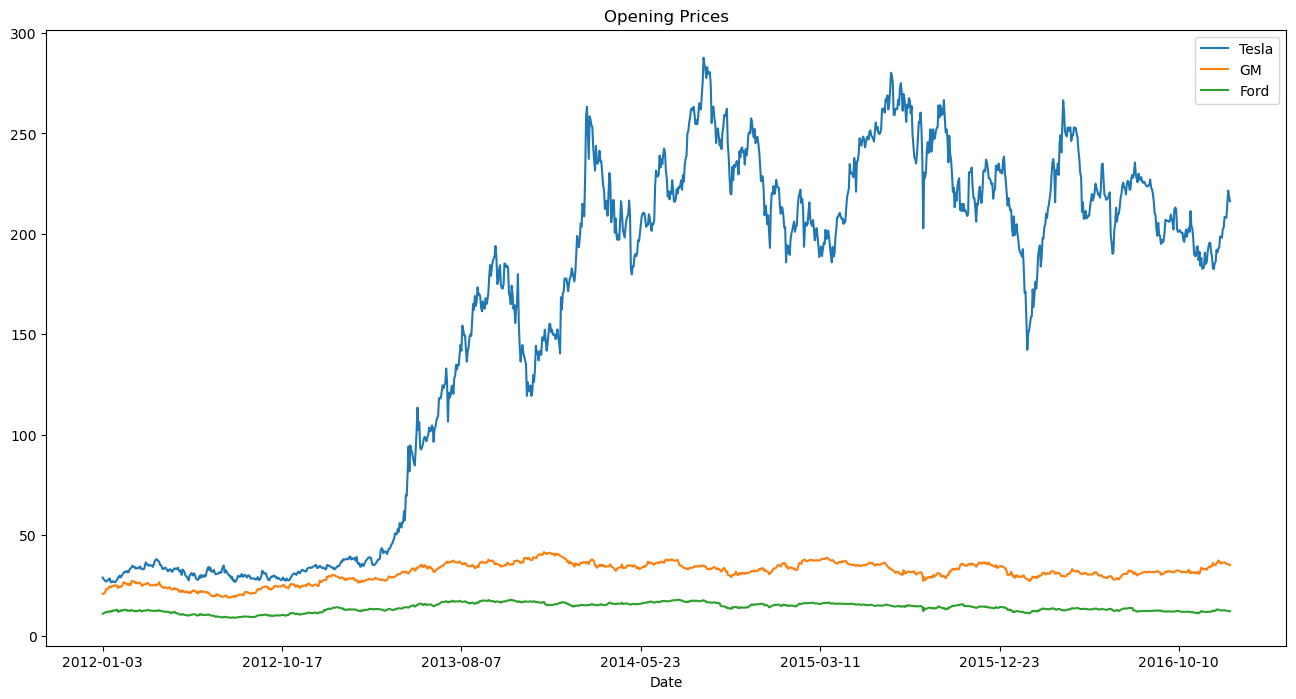

In [8]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')

plt.legend();

#### Plot the volume of stock traded every day

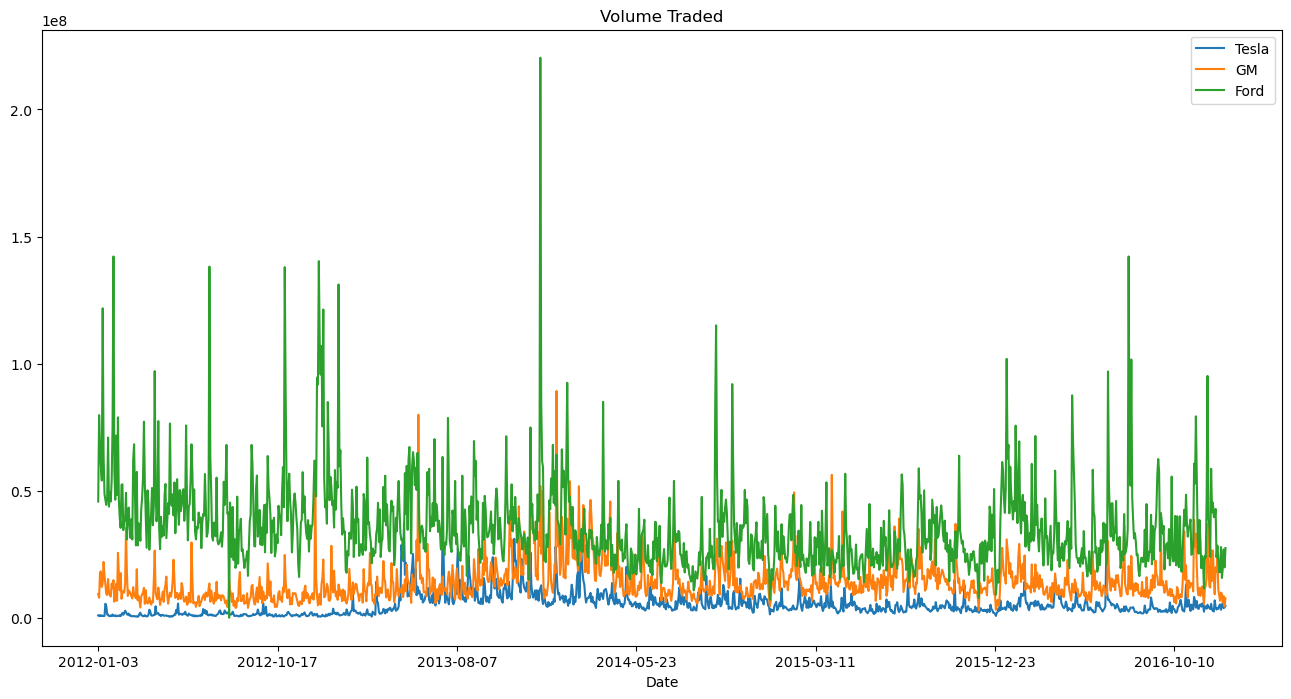

In [9]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

In [10]:
# Get the date of maximum trading
ford['Volume'].idxmax()

'2013-12-18'

<AxesSubplot: xlabel='Date'>

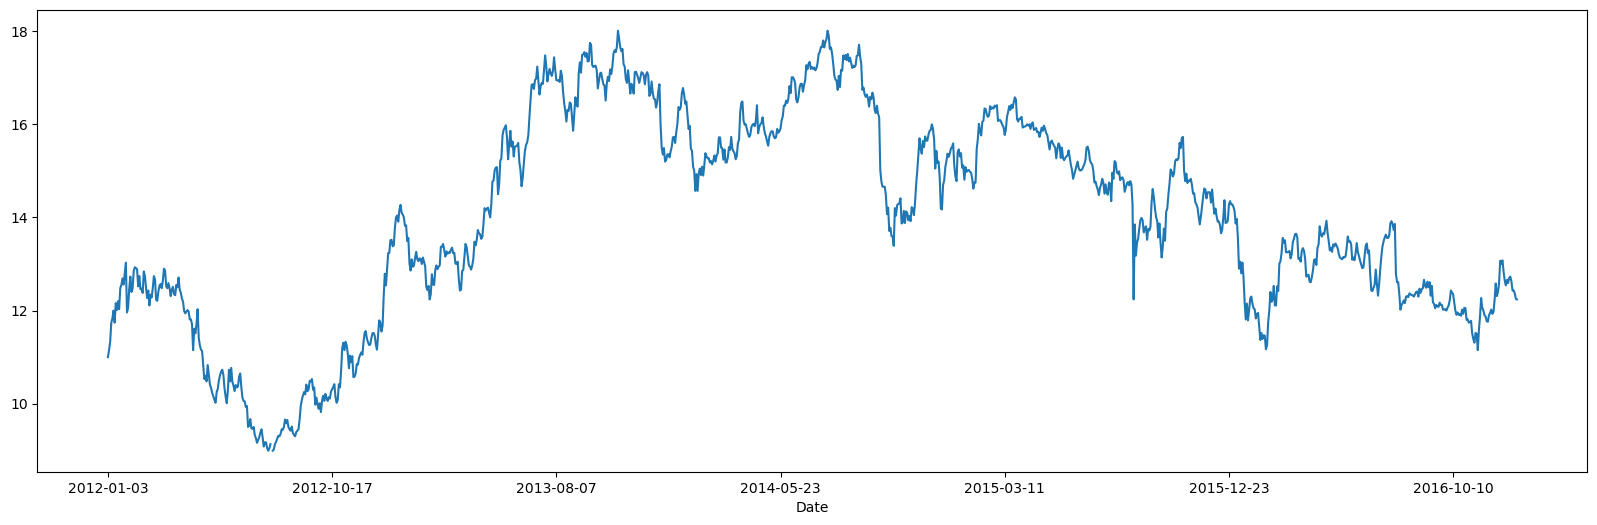

In [11]:
ford['Open'].plot(figsize=(20,6))

#### Create a new column for each dataframe called "Total Traded"

In [12]:
tesla['Total Traded']=tesla['Open']*tesla['Volume']
ford['Total Traded']=ford['Open']*ford['Volume']
gm['Total Traded']=gm['Open']*gm['Volume']

#### Plot the "Total Traded" against the time index.

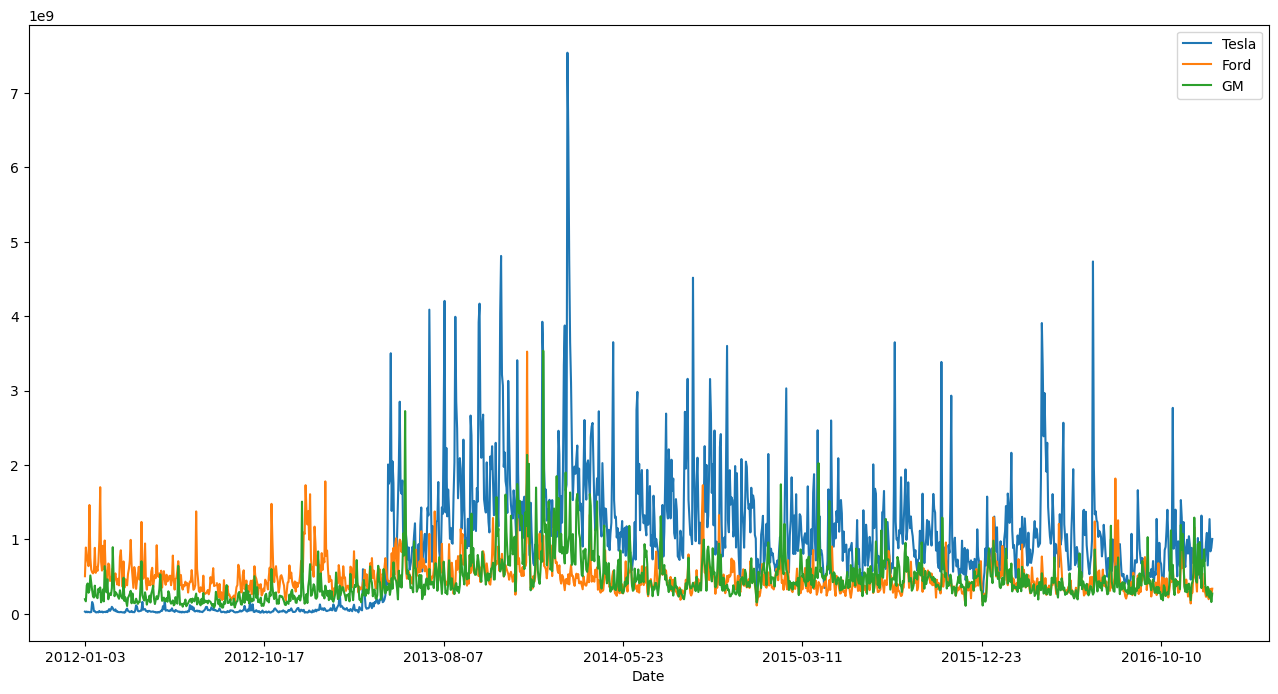

In [13]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
ford['Total Traded'].plot(label='Ford',figsize=(16,8))
gm['Total Traded'].plot(label='GM',figsize=(16,8))
plt.legend();

In [14]:
# Get the date of maximum "Total Traded"
tesla['Total Traded'].idxmax()

'2014-02-25'

#### Plot out the Moving Average 50 and Moving Average 200 for GM Stock.

<AxesSubplot: xlabel='Date'>

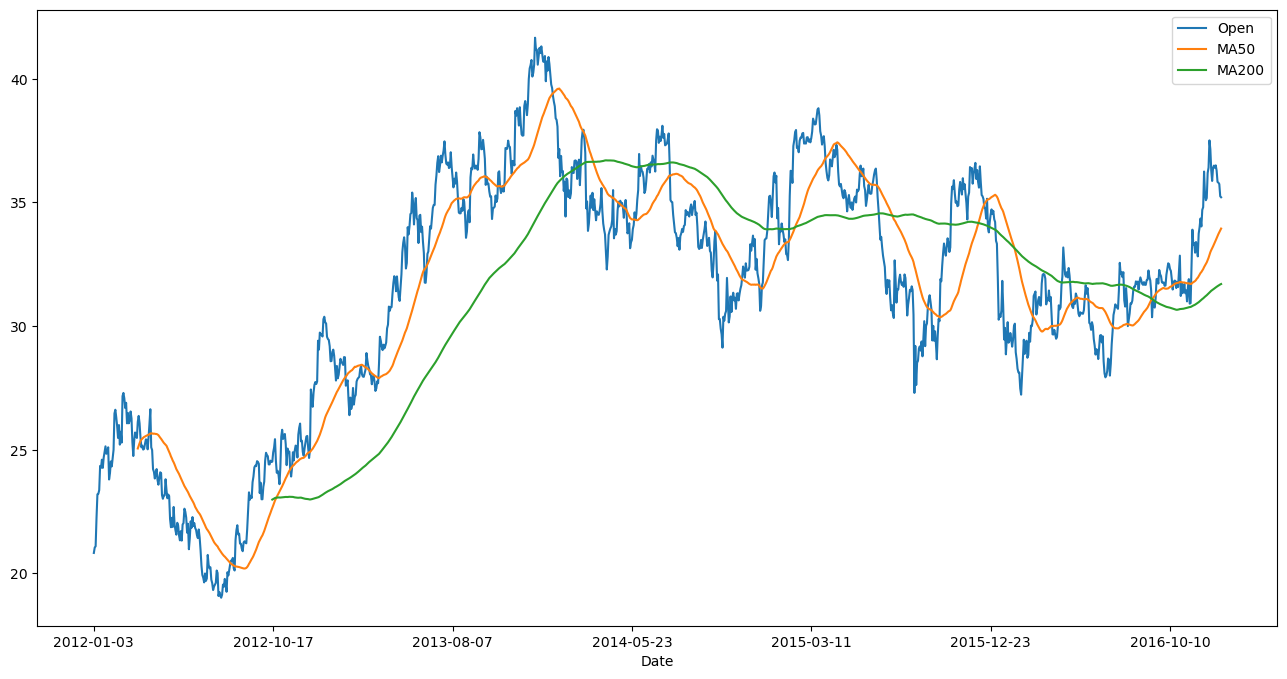

In [15]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(figsize=(16,8))

#### Visualize the scatter matrix plot of all the stocks'opening price.

In [16]:
from pandas.plotting import scatter_matrix

In [17]:
car_comp = pd.concat([tesla['Open'], ford['Open'], gm['Open']],axis=1)

In [18]:
car_comp.columns = ['Tesla Open','Ford Open','GM Open']

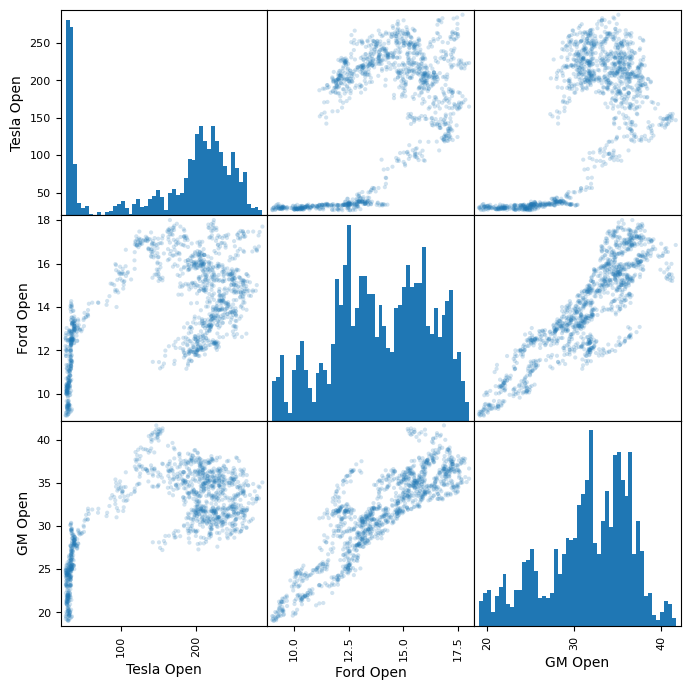

In [19]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

#### Create a CandleStick chart for Ford in January 2012.

In [21]:
import mplfinance as mpf
%matplotlib inline

In [25]:
ford.index = pd.DatetimeIndex(ford.index)

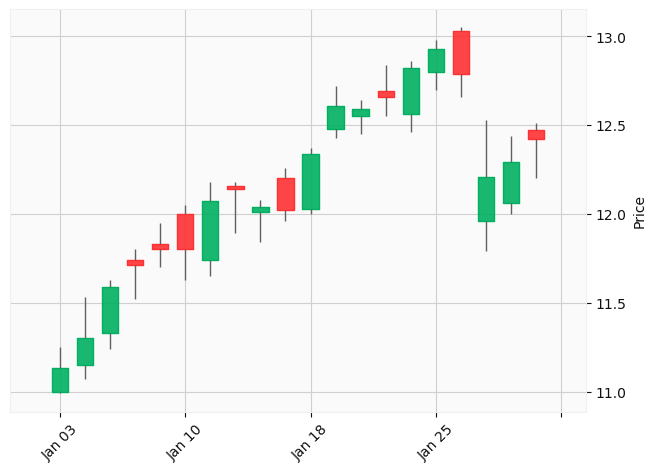

In [26]:
mpf.plot(ford.loc['2012-01-01':'2012-01-31'], type='candle', style='yahoo')

### Basic Financial Analysis

#### Daily Percentage Change

In [20]:
# Tesla
tesla['returns'] = tesla['Close'].pct_change(1)

In [21]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [22]:
# Ford
ford['returns'] = ford['Close'].pct_change(1)

In [23]:
ford.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686


In [24]:
# GM
gm['returns'] = gm['Close'].pct_change(1)

In [25]:
gm.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


#### Histogram of each company's return

<AxesSubplot: >

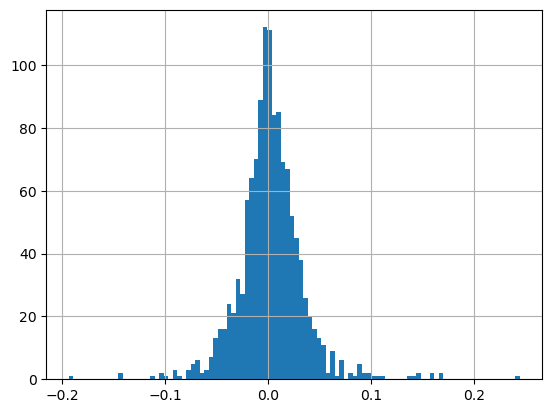

In [26]:
# Tesla
tesla['returns'].hist(bins=100)

<AxesSubplot: >

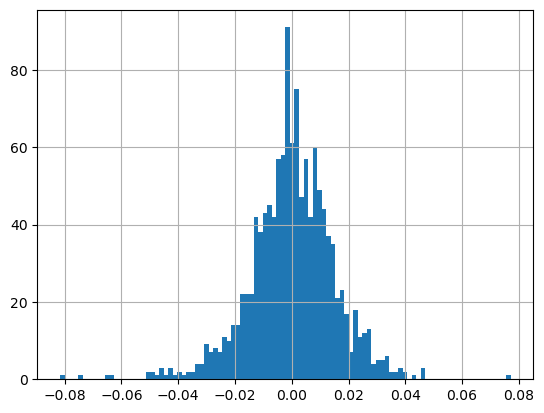

In [27]:
# Ford
ford['returns'].hist(bins=100)

<AxesSubplot: >

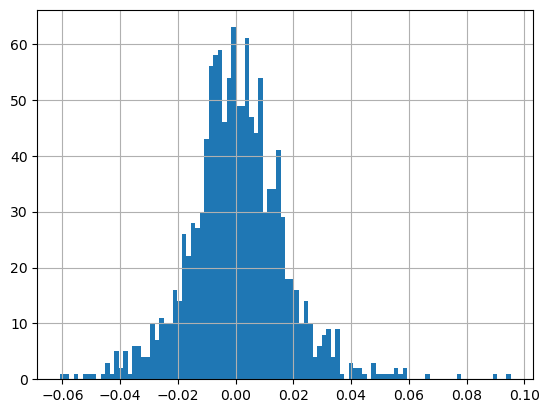

In [28]:
# GM
gm['returns'].hist(bins=100)

#### Compare the return of three companies

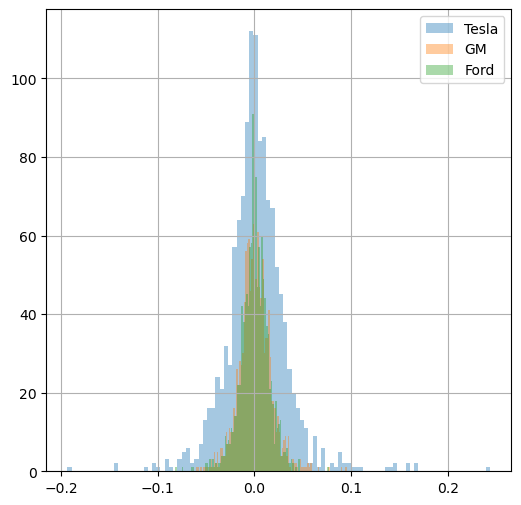

In [29]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(6,6),alpha=0.4)
gm['returns'].hist(bins=100,label='GM',figsize=(6,6),alpha=0.4)
ford['returns'].hist(bins=100,label='Ford',figsize=(6,6),alpha=0.4)
plt.legend();

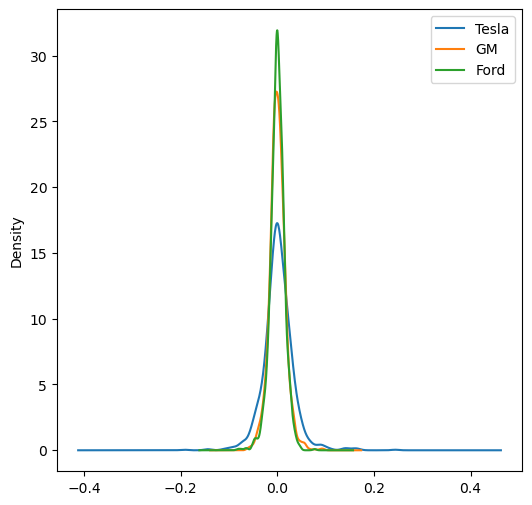

In [30]:
# Plot a KDE
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(6,6))
gm['returns'].plot(kind='kde',label='GM',figsize=(6,6))
ford['returns'].plot(kind='kde',label='Ford',figsize=(6,6))
plt.legend();

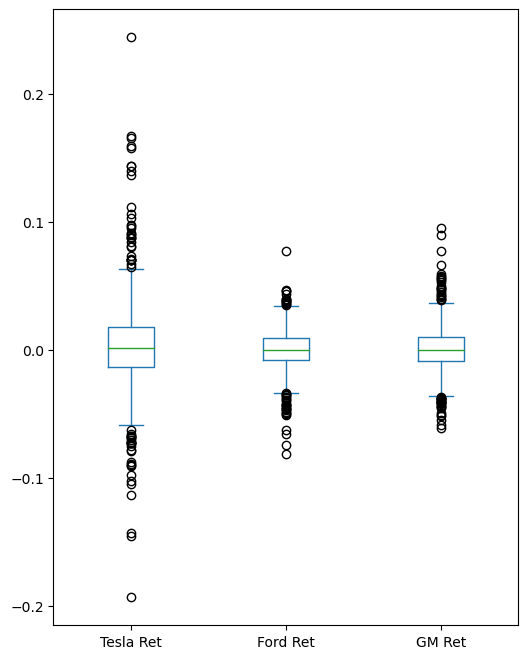

In [31]:
# Create a box plot
box_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']], axis=1)
box_df.columns = ['Tesla Ret', 'Ford Ret', 'GM Ret']
box_df.plot(kind='box', figsize=(6,8));

#### Comparing Daily Returns between Stocks

In [32]:
# gm.index = pd.DatetimeIndex(gm.index)
from pandas.plotting import scatter_matrix

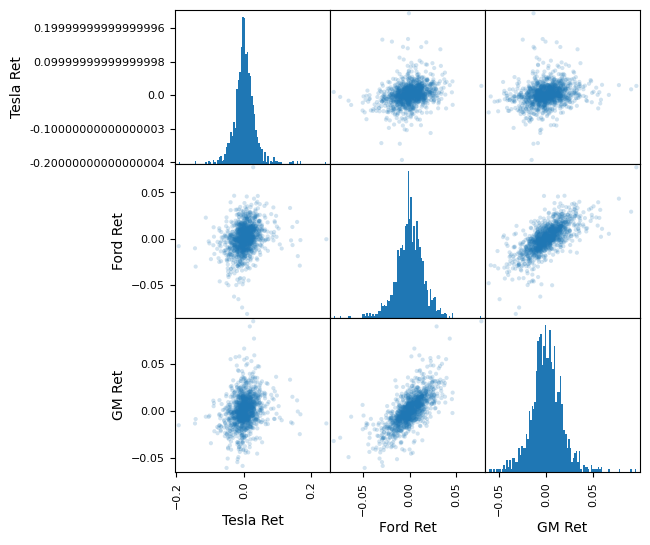

In [33]:
scatter_matrix(box_df,figsize=(6,6),alpha=0.2,hist_kwds={'bins':100});

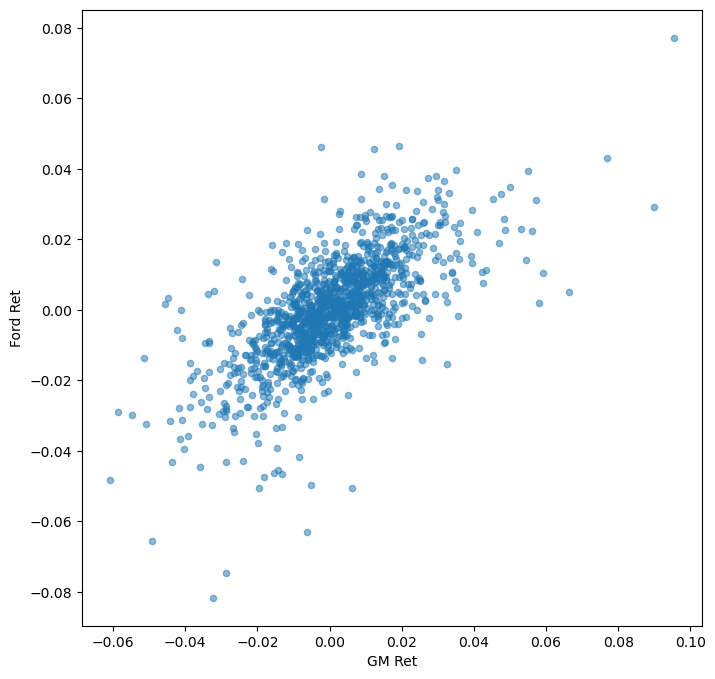

In [34]:
box_df.plot(kind='scatter',x='GM Ret', y='Ford Ret',alpha=0.5,figsize=(8,8));

#### Cumulative Daily Return

In [36]:
# Create a cumulative daily return column for each car company's dataframe
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

In [37]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


#### Plot the Cumulative Return columns against the time series index

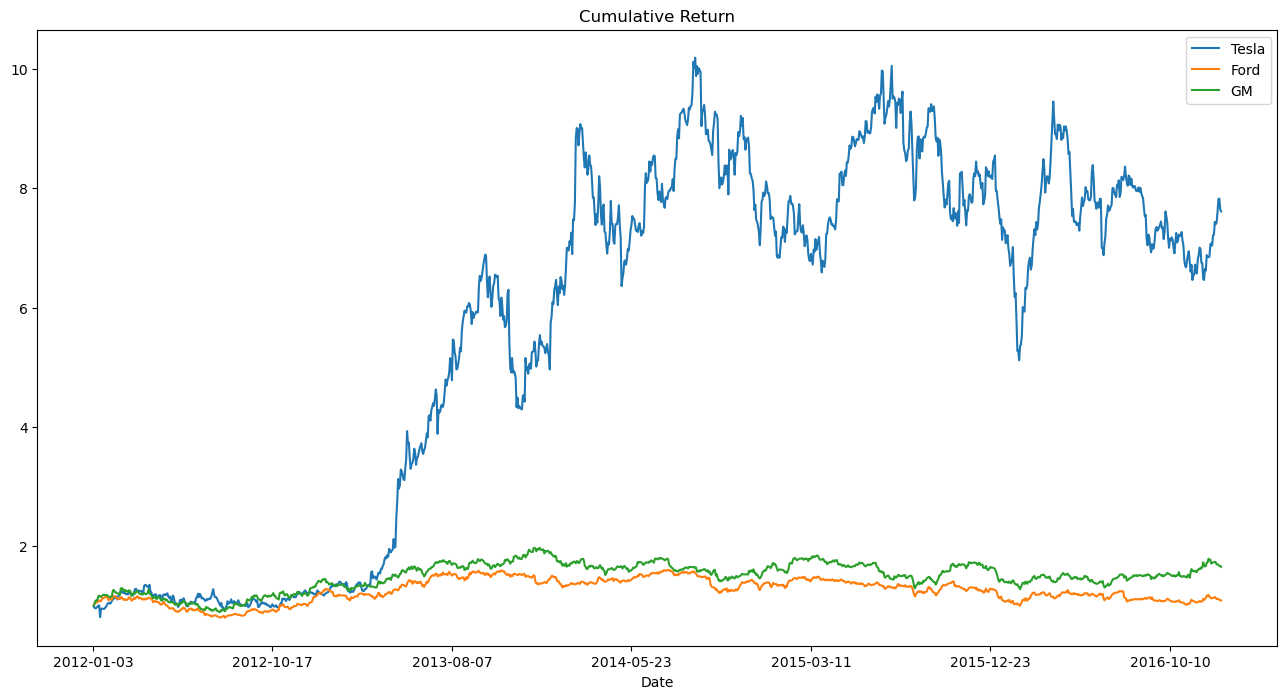

In [38]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend();